In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
 

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("https://storage.googleapis.com/kaggle-datasets/83416/193627/PGATOUR_data2.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1552948281&Signature=Rhnr01Xh97beL1eR169sQH%2BZAvRPEowL2kexKdwj72c3Pb4x4W%2B%2BU5kD9E2P%2FZxg2i6u0QRhz5iOUWpsZFn%2FZ9riFPQfrgqZugnzGFWyptsGlmdwm842JThiIa1eNtFJAaSjE4yMFbdbZNpJNLgTNFMq1bxIIoZK5WOwdlXo8eU29Y%2BmbPgjGHuXHsyDwYAp3sEDmWy3YaYAvJzpZRxLIZh6y%2F5fbm6Ofe%2BsAG%2BTXauJPURFtrhXt%2BvlUCV3%2BKdFzQXzgxJ%2BWM7bRHigLoys8ZEHmgtG5cXmoI58ShfzYcPXxMTJP1554wppT6ykpxqAMamacdDjzZ0gHiVOtKFF1Q%3D%3D")
df.head(10)

,Player,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,POINTS_BEHIND_LEAD,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,...,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE
0,Aaron Baddeley,27.0,342.0,0.0,1.0,5275.0,84.0,-0.062,-4.064,66.0,...,278.2,312.6,237.1,70.850,5518.0,78.0,16.24,228.0,1404.0,37.0
1,Aaron Wise,27.0,1498.0,1.0,4.0,4119.0,82.0,0.245,17.134,70.0,...,282.5,314.6,255.7,70.276,5888.0,84.0,16.53,250.0,1512.0,22.0
2,Abraham Ancer,29.0,909.0,0.0,5.0,4708.0,94.0,-0.052,-4.076,79.0,...,275.1,305.8,223.5,70.659,6745.0,96.0,14.76,255.0,1728.0,27.0
3,Adam Hadwin,24.0,1054.0,0.0,3.0,4563.0,88.0,0.145,8.729,60.0,...,277.7,307.7,246.9,70.750,6280.0,89.0,15.61,250.0,1602.0,30.0
4,Adam Schenk,28.0,239.0,0.0,1.0,5378.0,86.0,0.130,8.558,66.0,...,283.0,305.0,236.8,71.370,5683.0,80.0,16.88,243.0,1440.0,26.0
5,Adam Scott,20.0,1052.0,0.0,3.0,4565.0,74.0,-0.221,-11.944,54.0,...,286.3,313.6,264.6,70.420,5504.0,78.0,16.67,234.0,1404.0,38.0
6,Alex Cejka,24.0,524.0,0.0,2.0,5093.0,77.0,0.009,0.556,60.0,...,265.8,288.8,238.0,70.675,4852.0,69.0,15.06,187.0,1242.0,47.0
7,Alex Noren,17.0,1033.0,0.0,3.0,4584.0,63.0,0.686,28.117,41.0,...,280.9,308.1,260.2,69.973,4222.0,60.0,15.09,163.0,1080.0,36.0
8,Andrew Landry,26.0,1145.0,1.0,5.0,4472.0,78.0,-0.051,-3.516,69.0,...,272.2,296.0,244.2,71.059,5657.0,80.0,16.53,238.0,1440.0,31.0
9,Andrew Putnam,27.0,1063.0,1.0,5.0,4554.0,93.0,0.023,1.655,73.0,...,272.6,296.0,248.0,70.579,6239.0,89.0,14.17,227.0,1602.0,29.0


In [3]:
df = df[['Player', 'POINTS', 'AVG_SCORE', 'BOGEYS_MADE']]
df.head(10)

,Player,POINTS,AVG_SCORE,BOGEYS_MADE
0,Aaron Baddeley,342.0,70.850,228.0
1,Aaron Wise,1498.0,70.276,250.0
2,Abraham Ancer,909.0,70.659,255.0
3,Adam Hadwin,1054.0,70.750,250.0
4,Adam Schenk,239.0,71.370,243.0
5,Adam Scott,1052.0,70.420,234.0
6,Alex Cejka,524.0,70.675,187.0
7,Alex Noren,1033.0,69.973,163.0
8,Andrew Landry,1145.0,71.059,238.0
9,Andrew Putnam,1063.0,70.579,227.0


In [4]:
df.shape

(331, 4)

In [5]:
df.isnull().values.any()

True

In [6]:
df = df.dropna()
df.isnull().values.any()

False

In [7]:
df.shape

(195, 4)

In [8]:
df.describe()

,POINTS,AVG_SCORE,BOGEYS_MADE
count,195.000000,195.000000,195.000000
mean,745.974359,70.893369,222.194872
std,700.518059,0.820646,41.704446
min,10.000000,68.702000,123.000000
25%,267.500000,70.440500,193.500000
50%,587.000000,70.850000,223.000000
75%,1038.000000,71.324000,251.000000
max,5617.000000,74.891000,330.000000


In [18]:
df1 = df.sort_values('POINTS', ascending=False)
df1.head(10)

,Player,POINTS,AVG_SCORE,BOGEYS_MADE
32,Bryson DeChambeau,5617.0,69.624,236.0
60,Dustin Johnson,3289.0,68.702,158.0
96,Justin Rose,3191.0,69.000,143.0
179,Tony Finau,3169.0,69.515,244.0
97,Justin Thomas,3084.0,69.117,196.0
31,Brooks Koepka,2551.0,69.310,145.0
33,Bubba Watson,2277.0,70.250,207.0
38,Cameron Smith,2231.0,70.525,208.0
138,Phil Mickelson,1969.0,69.927,240.0
82,Jason Day,1935.0,69.586,168.0


In [19]:
Top20 = df1.iloc[0:20] # first twenty rows of dataframe
Top20

,Player,POINTS,AVG_SCORE,BOGEYS_MADE
32,Bryson DeChambeau,5617.0,69.624,236.0
60,Dustin Johnson,3289.0,68.702,158.0
96,Justin Rose,3191.0,69.000,143.0
179,Tony Finau,3169.0,69.515,244.0
97,Justin Thomas,3084.0,69.117,196.0
31,Brooks Koepka,2551.0,69.310,145.0
33,Bubba Watson,2277.0,70.250,207.0
38,Cameron Smith,2231.0,70.525,208.0
138,Phil Mickelson,1969.0,69.927,240.0
82,Jason Day,1935.0,69.586,168.0


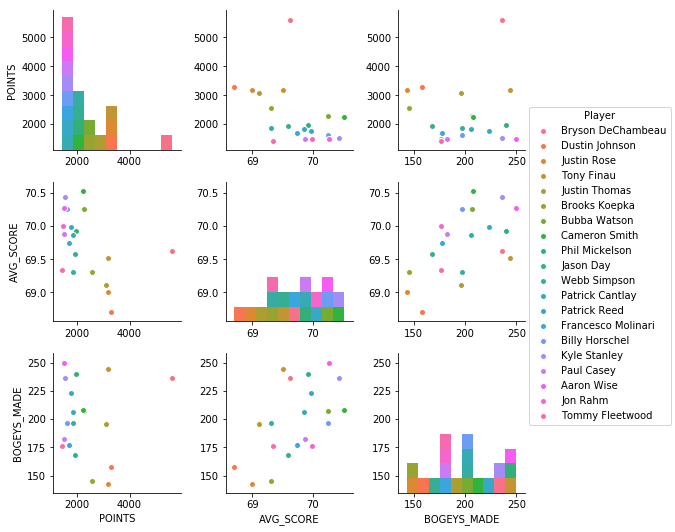

In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:100% !important; }</style>"));sns.pairplot(Top20, hue = "Player")

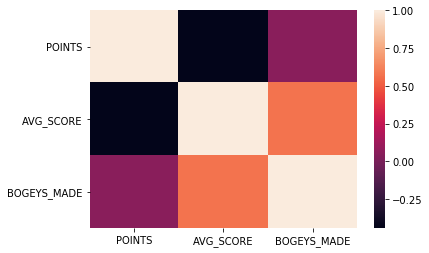

In [21]:
corr = Top20.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [22]:
rating = Top20.pivot("Player", "POINTS", "AVG_SCORE")

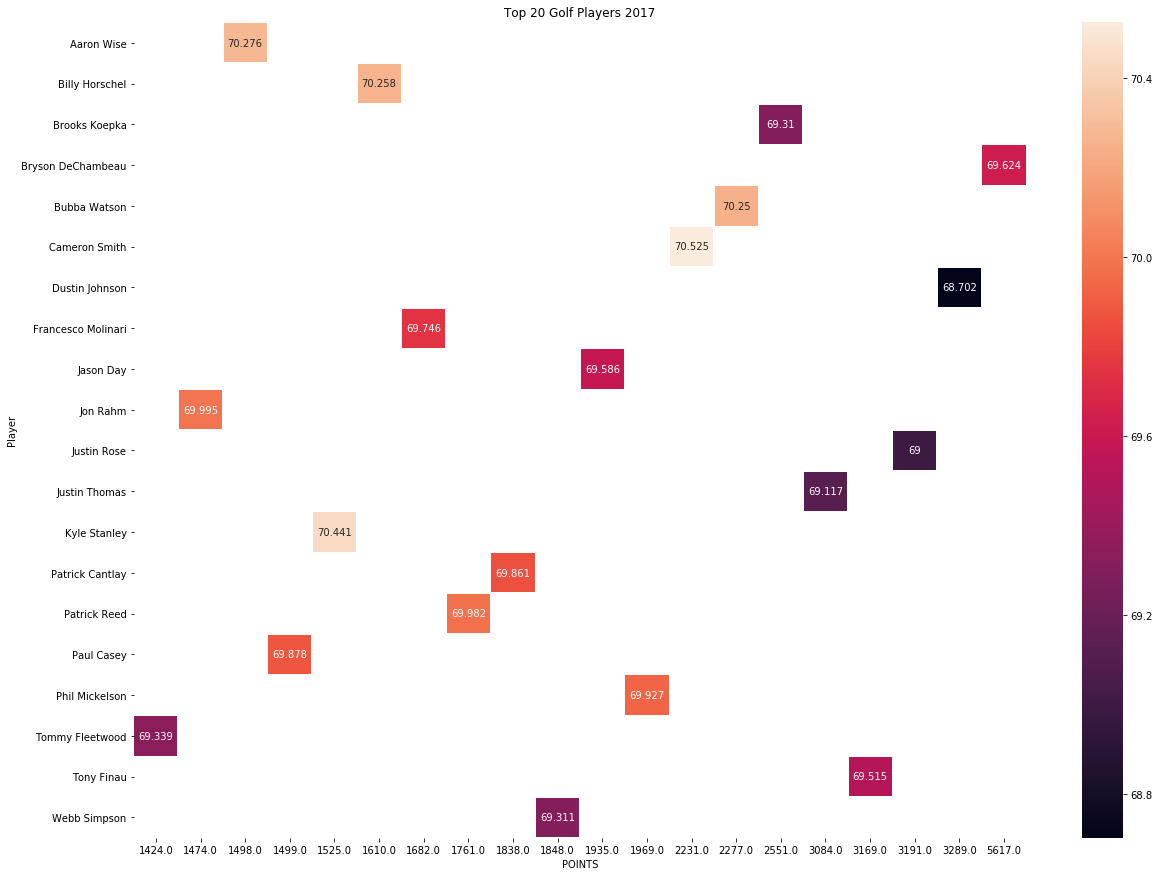

In [23]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Top 20 Golf Players 2017")
sns.heatmap(rating, linewidth = 0.5, annot = True, fmt = "g")
